<a href="https://colab.research.google.com/github/YanNews2805/C-lculo-Num-rico/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte Inicial

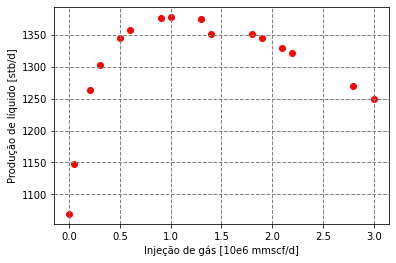

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 

qi = np.array([0.00, 0.05, 0.20, 0.30, 0.50, 0.60, 0.90, 1.00,
      1.30, 1.40, 1.80, 1.90, 2.10, 2.20, 2.80, 3.00])

qt = np.array([1068.4693, 1146.8875, 1264.2343, 1302.5584, 1345.3113,
      1358.1356, 1376.8498, 1378.6029, 1375.8104, 1351.9915,
      1351.9915, 1344.4829, 1330.1172, 1322.3743, 1269.3053,
      1249.4819])

x0, x1, x2, x3 = sym.symbols('x0 x1 x2 x3')
all_x = [x0, x1, x2, x3]
x_vector = np.array(all_x)

qi.shape, qt.shape, x_vector.shape = (16, 1), (16, 1), (4, 1)

plt.scatter(qi, qt, color='red')
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("Injeção de gás [10e6 mmscf/d]")
plt.ylabel("Produção de líquido [stb/d]")
plt.show()

# Solução do tipo = x0 + x1q

FiniteSet((1269.22760157617, 26.3821683182665))


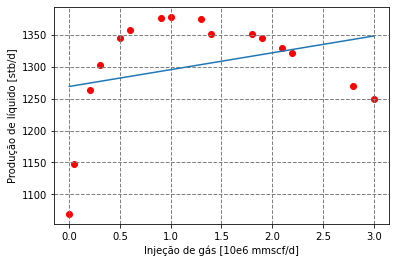

104046.802199260


In [2]:
A = np.concatenate((np.ones((16, 1)), qi, np.power(qi, 2), np.power(qi, 3), np.log(qi+1)),axis=1)
b = qt

x = x_vector
Ax_b = sym.Matrix(A[:,:2])*sym.Matrix(x[:2,:]) - sym.Matrix(b)

f = sum([row**2 for row in Ax_b])
jac_f = [f.diff(xn) for xn in all_x[:2]]
solution = sym.linsolve(jac_f, all_x[:2])
print(solution)

q = np.linspace(0, 3, 100)
y = solution.args[0][0] + solution.args[0][1]*q

plt.plot(q,y)
plt.scatter(qi, qt, color='red')
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("Injeção de gás [10e6 mmscf/d]")
plt.ylabel("Produção de líquido [stb/d]")
plt.show()

Ax_b_resultant = sym.Matrix(A[:,:2])*sym.Matrix(np.array(solution.args[0])) - sym.Matrix(b)
square_error = sum([row**2 for row in Ax_b_resultant])
print(square_error)

# Solução do tipo = x0 + x1q + x2q^2

FiniteSet((1176.76586679833, 265.909916439051, -84.8986036501577))


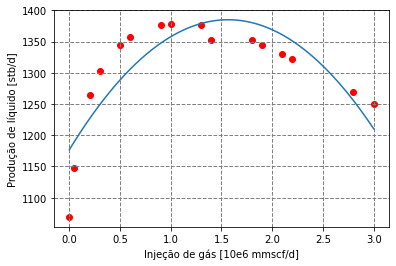

31329.4880335020


In [3]:
Ax_b = sym.Matrix(A[:,:3])*sym.Matrix(x[:3,:]) - sym.Matrix(b)

f = sum([row**2 for row in Ax_b])
jac_f = [f.diff(xn) for xn in all_x[:3]]
solution = sym.linsolve(jac_f, all_x[:3])
print(solution)

q = np.linspace(0, 3, 100)
y = solution.args[0][0] + solution.args[0][1]*q + solution.args[0][2]*q**2

plt.plot(q,y)
plt.scatter(qi, qt, color='red')
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("Injeção de gás [10e6 mmscf/d]")
plt.ylabel("Produção de líquido [stb/d]")
plt.show()

Ax_b_resultant = sym.Matrix(A[:,:3])*sym.Matrix(np.array(solution.args[0])) - sym.Matrix(b)
square_error = sum([row**2 for row in Ax_b_resultant])
print(square_error)

# Solução do tipo = x0 + x1q + x2q^2 + x3q^3

FiniteSet((1125.10257943572, 558.156168536679, -345.991143393541, 58.544015239033))


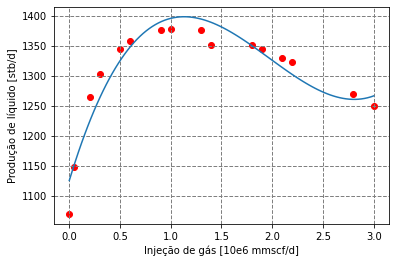

10275.1641703484


In [4]:
Ax_b = sym.Matrix(A[:,:4])*sym.Matrix(x[:4,:]) - sym.Matrix(b)
f = sum([row**2 for row in Ax_b])
jac_f = [f.diff(xn) for xn in all_x[:4]]
solution = sym.linsolve(jac_f, all_x[:4])
print(solution)

q = np.linspace(0, 3, 100)
y = solution.args[0][0] + solution.args[0][1]*q + solution.args[0][2]*q**2 + solution.args[0][3]*q**3

plt.plot(q,y)
plt.scatter(qi, qt, color='red')
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("Injeção de gás [10e6 mmscf/d]")
plt.ylabel("Produção de líquido [stb/d]")
plt.show()

Ax_b_resultant = sym.Matrix(A[:,:4])*sym.Matrix(np.array(solution.args[0])) - sym.Matrix(b)
square_error = sum([row**2 for row in Ax_b_resultant])
print(square_error)

# Solução do tipo = x0 + x1q + x2q^2 + x3ln(qi + 1)

FiniteSet((1103.97479862227, -1290.61129192904, 124.649319464868, 2097.69348851927))


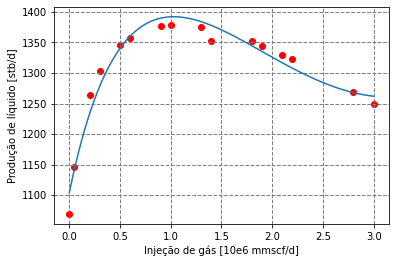

4631.10522871733


In [5]:
Ax_b = sym.Matrix(A[:,[0, 1, 2, 4]])*sym.Matrix(x[:4,:]) - sym.Matrix(b)
f = sum([row**2 for row in Ax_b])
jac_f = [f.diff(xn) for xn in all_x[:4]]
solution = sym.linsolve(jac_f, all_x[:4])
print(solution)

q = np.linspace(0, 3, 100)
y = solution.args[0][0] + solution.args[0][1]*q + solution.args[0][2]*q**2 + solution.args[0][3]*np.log(q+1)

plt.plot(q,y)
plt.scatter(qi, qt, color='red')
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("Injeção de gás [10e6 mmscf/d]")
plt.ylabel("Produção de líquido [stb/d]")
plt.show()

Ax_b_resultant = sym.Matrix(A[:,[0, 1, 2, 4]])*sym.Matrix(np.array(solution.args[0])) - sym.Matrix(b)
square_error = sum([row**2 for row in Ax_b_resultant])
print(square_error)

x(1) = ax(0) + bu(0)

---

x(2) = a(ax(0) + bu(0)) + bu(1)

---

x(3) = a(a(ax(0) + bu(0)) + bu(1)) + bu(2)

---

x(4) = a(a(a(ax(0) + bu(0)) + bu(1)) + bu(2)) + bu(3)

#Minimização de norma

In [6]:
import numpy as np
import sympy as sym

u0, u1, u2, u3, u4, u5, u6, u7, u8, u9 = sym.symbols('u0 u1 u2 u3 u4 u5 u6 u7 u8 u9')



a = 3.5
b = 0.5
tf = 10
x0 = 2.5
u = [u0, u1, u2, u3, u4, u5, u6, u7, u8, u9]

def sistema_escalar(tempo_final, vetor_u, estado_inicial, ganho_a, ganho_b):
  estados = [estado_inicial]
  for i in range(tempo_final):
    x = ganho_a*estados[i] + ganho_b*vetor_u[i]
    estados.append(x)
  return estados

def erro_de_seguimento(vetor_u, vetor_x):
  J = sum(map(lambda u:u*u,vetor_u)) + sum(map(lambda x:x*x,vetor_x[1:]))
  return J

vetor_estados = sistema_escalar(tf, u, x0, a, b)
z = erro_de_seguimento(u, vetor_estados)
jac_z = [z.diff(un) for un in u][:-1]
jac_z.append(vetor_estados[-1])
solution = sym.linsolve(jac_z, u)
solution

FiniteSet((-16.1024262149852, -4.50086551833544, -1.25805817483384, -0.351645812484293, -0.0982899634576017, -0.0274725467649272, -0.00767561119574962, -0.00213336814750507, -0.000553095695121139, -0.00774333647230846))

         x0          u             x           J
0  2.500000 -16.102426  6.987869e-01  265.538130
1  0.698787  -4.500866  1.953214e-01  286.284224
2  0.195321  -1.258058  5.459569e-02  287.905084
3  0.054596  -0.351646  1.526200e-02  288.031720
4  0.015262  -0.098290  4.272033e-03  288.041614
5  0.004272  -0.027473  1.215843e-03  288.042387
6  0.001216  -0.007676  4.176436e-04  288.042447
7  0.000418  -0.002133  3.950684e-04  288.042452
8  0.000395  -0.000553  1.106191e-03  288.042452
9  0.001106  -0.007743  1.778158e-09  288.042513


<Figure size 432x288 with 0 Axes>

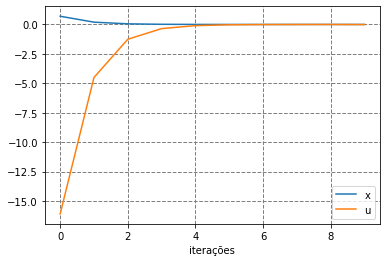

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


result = pd.DataFrame(columns=["x0","u", "x", "J"])

a = 3.5
b = 0.5
tf = 10
x0 = 2.5
u = [-16.1024262149852, -4.50086551833544, -1.25805817483384, -0.351645812484293, -0.0982899634576017, -0.0274725467649272, -0.00767561119574962, -0.00213336814750507, -0.000553095695121139, -0.00774333647230846]


def erro_de_seguimento(vetor_u, vetor_x):
  J = sum(map(lambda x:x*x,vetor_u)) + sum(map(lambda x:x*x,vetor_x))
  return J
def sistema_escalar(tempo_final, vetor_u, estado_inicial, ganho_a, ganho_b, dataframe):
  estados = [estado_inicial]
  for i in range(tempo_final):
    x = ganho_a*estados[i] + ganho_b*vetor_u[i]
    estados.append(x)

    dataframe = dataframe.append({"x0": estados[i], "u": vetor_u[i], "x": x,
                                    "J": erro_de_seguimento(estados[:i+1], vetor_u[:i+1])}, ignore_index=True)
  return dataframe


system_result = sistema_escalar(tf, u, x0, a, b, result)
print(system_result)


plt.figure()
system_result.plot(y=["x", "u"], use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("iterações")
plt.show()

#Método de Euler

            h1         h2        h3        h4
596  20.055362  21.147030  7.627518  8.039780
597  20.055450  21.147744  7.627518  8.039789
598  20.055538  21.148452  7.627519  8.039798
599  20.055625  21.149154  7.627519  8.039807
600  20.055710  21.149850  7.627519  8.039816


<Figure size 432x288 with 0 Axes>

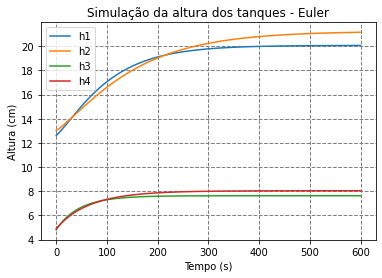

In [13]:
import sympy as sym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Condições Inicias
A1, A2, A3, A4 = (28, 32, 28, 32)
a1, a2, a3, a4 = (0.071, 0.057, 0.071, 0.057)
k1, k2 = (3.14, 3.29)
y1, y2 = (0.43, 0.34)
v1, v2 = (4, 4)
g = 981

def system(y, t):
    return [
        (-a1*(2*g*y[0])**(1/2) + a3*(2*g*y[2])**(1/2) + y1*k1*v1)/A1,
        (-a2*(2*g*y[1])**(1/2) + a4*(2*g*y[3])**(1/2) + y2*k2*v2)/A2,
        (-a3*(2*g*y[2])**(1/2) + (1-y2)*k2*v2)/A3,
        (-a4*(2*g*y[3])**(1/2) + (1-y1)*k1*v1)/A4
    ]


tout = np.linspace(0, 600, 601)
h1_0, h2_0, h3_0, h4_0 = 12.6, 13, 4.8, 4.9


def euler_fw(rhs, y0, tout):
    y0 = np.atleast_1d(np.asarray(y0, dtype=np.float64))
    dydt = np.empty_like(y0)
    yout = np.zeros((len(tout), len(y0)))
    yout[0] = y0
    t_old = tout[0]
    for i, t in enumerate(tout[1:], 1):
        dydt[:] = rhs(yout[i-1], t)
        h = t - t_old
        yout[i] = yout[i-1] + dydt*h
        t_old = t
    return yout


h_out  = euler_fw(system, (h1_0, h2_0, h3_0, h4_0), tout)

dataframe = pd.DataFrame(data=h_out, columns=["h1", "h2", "h3", "h4"])
print(dataframe.tail())

plt.figure()
dataframe.plot(use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Simulação da altura dos tanques - Euler")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (cm)")
plt.show()

#Método de Runge-Kutta de 2ª ordem

            h1         h2        h3        h4
596  20.055006  21.145110  7.627516  8.039739
597  20.055099  21.145837  7.627517  8.039748
598  20.055191  21.146558  7.627517  8.039758
599  20.055281  21.147273  7.627517  8.039768
600  20.055370  21.147982  7.627518  8.039777


<Figure size 432x288 with 0 Axes>

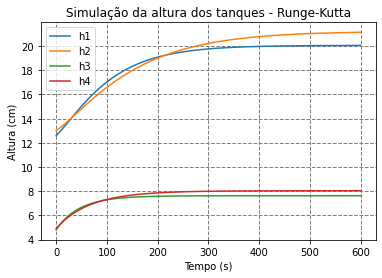

In [8]:
import sympy as sym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Condições Inicias
A1, A2, A3, A4 = (28, 32, 28, 32)
a1, a2, a3, a4 = (0.071, 0.057, 0.071, 0.057)
k1, k2 = (3.14, 3.29)
y1, y2 = (0.43, 0.34)
v1, v2 = (4, 4)
g = 981



def system(y, t):
    return [
        (-a1*(2*g*y[0])**(1/2) + a3*(2*g*y[2])**(1/2) + y1*k1*v1)/A1,
        (-a2*(2*g*y[1])**(1/2) + a4*(2*g*y[3])**(1/2) + y2*k2*v2)/A2,
        (-a3*(2*g*y[2])**(1/2) + (1-y2)*k2*v2)/A3,
        (-a4*(2*g*y[3])**(1/2) + (1-y1)*k1*v1)/A4
    ]


tout = np.linspace(0, 600, 601)
h1_0, h2_0, h3_0, h4_0 = 12.6, 13, 4.8, 4.9


def rungekutta_fw(rhs, y0, tout):
    y0 = np.atleast_1d(np.asarray(y0, dtype=np.float64))
    dydt = np.empty_like(y0)
    dydt2 = np.empty_like(y0)
    yout = np.zeros((len(tout), len(y0)))
    yout[0] = y0
    t_old = tout[0]
    for i, t in enumerate(tout[1:], 1):
        dydt[:] = rhs(yout[i-1], t)
        h = t - t_old
        dydt2[:] = rhs(yout[i-1]+h*dydt, t)
  
        yout[i] = yout[i-1] + h/2*(dydt+dydt2)
        t_old = t
    return yout


h_out  = rungekutta_fw(system, (h1_0, h2_0, h3_0, h4_0), tout)

dataframe = pd.DataFrame(data=h_out, columns=["h1", "h2", "h3", "h4"])
print(dataframe.tail())
plt.figure()
dataframe.plot(use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)

plt.title("Simulação da altura dos tanques - Runge-Kutta")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (cm)")
plt.show()